In [1]:
#loading packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#loading the cab_data dataset
cab_data = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Cab_Data.csv')
#checking the shape
print(cab_data.shape)
#getting the first 5 rows
cab_data.head()

(359392, 7)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
#loading the city dataset
city = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\City.csv')
#checking the shape
print(city.shape)
#getting the first 5 rows
city.head()

(20, 3)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [4]:
#loading the customer_id dataset
customer_id = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Customer_ID.csv')
#checking the shape
print(customer_id.shape)
#getting the first 5 rows
customer_id.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [5]:
#loading the transaction_id dataset
transaction_id = pd.read_csv(r'D:\Purity\DataGlacier Internship\week2\DataSets-main\Transaction_ID.csv')
#checking the shape
print(transaction_id.shape)
#getting the first 5 rows
transaction_id.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
#replacing the spaces in the column names with '_'
Dataframes = [cab_data, city, customer_id, transaction_id]
for df in Dataframes:
    df.columns = df.columns.str.replace(' ', '_')

In [7]:
for df in Dataframes:
    print('\n')
    #checking variable types
    print(df.dtypes)
    #checking missing data
    print(df.isna().sum())



Transaction_ID      int64
Date_of_Travel      int64
Company            object
City               object
KM_Travelled      float64
Price_Charged     float64
Cost_of_Trip      float64
dtype: object
Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
dtype: int64


City          object
Population    object
Users         object
dtype: object
City          0
Population    0
Users         0
dtype: int64


Customer_ID            int64
Gender                object
Age                    int64
Income_(USD/Month)     int64
dtype: object
Customer_ID           0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64


Transaction_ID     int64
Customer_ID        int64
Payment_Mode      object
dtype: object
Transaction_ID    0
Customer_ID       0
Payment_Mode      0
dtype: int64


In [8]:
#joining cab_data and transcation_id
first_merge = pd.merge(cab_data, transaction_id, how='outer', on=['Transaction_ID'])
print(first_merge.shape)
first_merge.head()

(440098, 9)


,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode
0,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [9]:
first_merge.isna().sum()

Transaction_ID        0
Date_of_Travel    80706
Company           80706
City              80706
KM_Travelled      80706
Price_Charged     80706
Cost_of_Trip      80706
Customer_ID           0
Payment_Mode          0
dtype: int64

In [10]:
#joining customer_id into the merged dataset
second_merge = pd.merge(customer_id, first_merge, how='outer', on=['Customer_ID'])
print(second_merge.shape)
second_merge.head()

(440098, 12)


,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode
0,29290,Male,28,10813,10000011,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card
1,29290,Male,28,10813,10351127,43302.0,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash
2,29290,Male,28,10813,10412921,43427.0,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card
3,27703,Male,27,9237,10000012,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card
4,27703,Male,27,9237,10320494,43211.0,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card


In [11]:
second_merge.isna().sum()

Customer_ID               0
Gender                    0
Age                       0
Income_(USD/Month)        0
Transaction_ID            0
Date_of_Travel        80706
Company               80706
City                  80706
KM_Travelled          80706
Price_Charged         80706
Cost_of_Trip          80706
Payment_Mode              0
dtype: int64

In [12]:
#joining city to the merged dataframes
master_data = pd.merge(city, second_merge, how='outer', on=['City'])
print(master_data.shape)
master_data.head()

(440099, 14)


,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,42377.0,Pink Cab,17.85,242.90,198.1350,Cash
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,42405.0,Yellow Cab,34.34,1099.35,482.1336,Cash
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,42442.0,Yellow Cab,19.20,559.30,264.9600,Card
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,42621.0,Yellow Cab,14.84,322.28,179.8608,Card
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,42631.0,Pink Cab,37.08,728.27,393.0480,Card


In [13]:
master_data.isna().sum()

City                  80706
Population            80706
Users                 80706
Customer_ID               1
Gender                    1
Age                       1
Income_(USD/Month)        1
Transaction_ID            1
Date_of_Travel        80707
Company               80707
KM_Travelled          80707
Price_Charged         80707
Cost_of_Trip          80707
Payment_Mode              1
dtype: int64

In [14]:
#checking for duplicates in the master data
print(master_data.Transaction_ID.unique().shape)
#checking variable types
master_data.dtypes

(440099,)


City                   object
Population             object
Users                  object
Customer_ID           float64
Gender                 object
Age                   float64
Income_(USD/Month)    float64
Transaction_ID        float64
Date_of_Travel        float64
Company                object
KM_Travelled          float64
Price_Charged         float64
Cost_of_Trip          float64
Payment_Mode           object
dtype: object

In [15]:
#getting statistical summary of numerical columns
master_data.describe()

,Customer_ID,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip
count,440098.000000,440098.000000,440098.000000,4.400980e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,23619.513120,35.360197,15092.181989,1.022006e+07,42964.067998,22.567254,423.443311,286.190113
std,21195.549816,12.582668,7987.309505,1.270455e+05,307.467197,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,3530.000000,25.000000,8391.000000,1.011004e+07,42697.000000,12.000000,206.437500,151.200000
50%,15168.000000,33.000000,14767.000000,1.022006e+07,42988.000000,22.440000,386.360000,282.480000
75%,43884.000000,42.000000,21084.000000,1.033008e+07,43232.000000,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [16]:
#getting the list for numerical and categorical columns
num_cols = ['Age', 'Income_(USD/Month)', 'KM_Travelled', 'Price_Charged', 'Cost_of_Trip']
cat_cols = ['City', 'Gender', 'Company', 'Payment_Mode']

In [17]:
# getting value counts for each categorical column
def count_value(df, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df[col].value_counts())
count_value(master_data, cat_cols)


For column City
NEW YORK NY         99885
CHICAGO IL          56625
LOS ANGELES CA      48033
WASHINGTON DC       43737
BOSTON MA           29692
SAN DIEGO CA        20488
SILICON VALLEY       8519
SEATTLE WA           7997
ATLANTA GA           7557
DALLAS TX            7017
MIAMI FL             6454
AUSTIN TX            4896
ORANGE COUNTY        3982
DENVER CO            3825
NASHVILLE TN         3010
SACRAMENTO CA        2367
PHOENIX AZ           2064
TUCSON AZ            1931
PITTSBURGH PA        1313
SAN FRANCISCO CA        1
Name: City, dtype: int64

For column Gender
Male      256611
Female    183487
Name: Gender, dtype: int64

For column Company
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

For column Payment_Mode
Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64


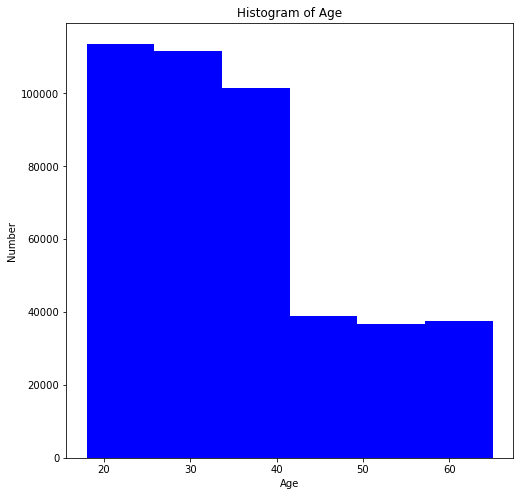

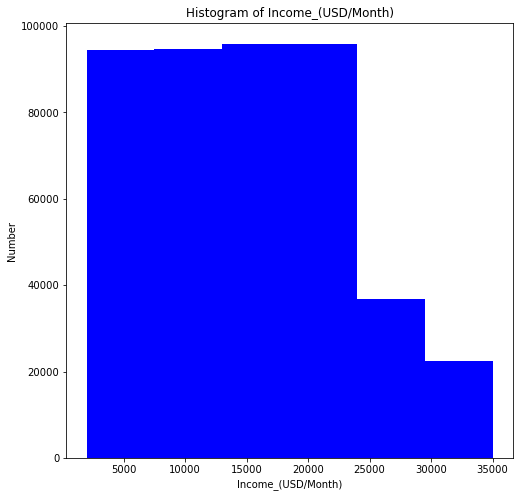

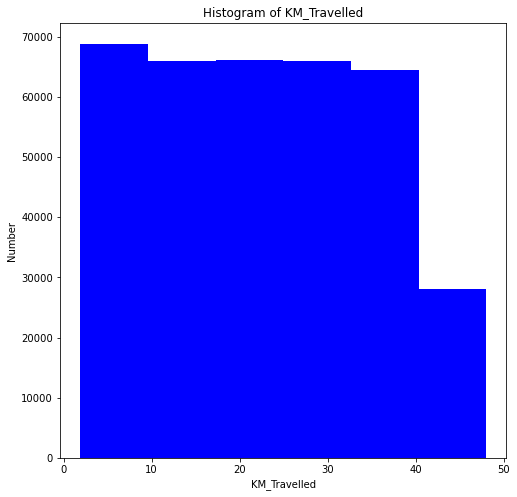

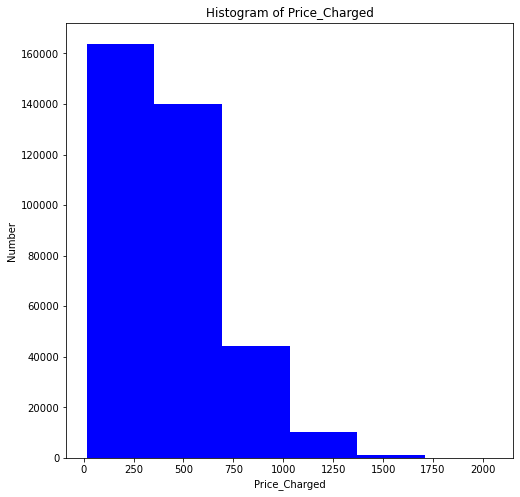

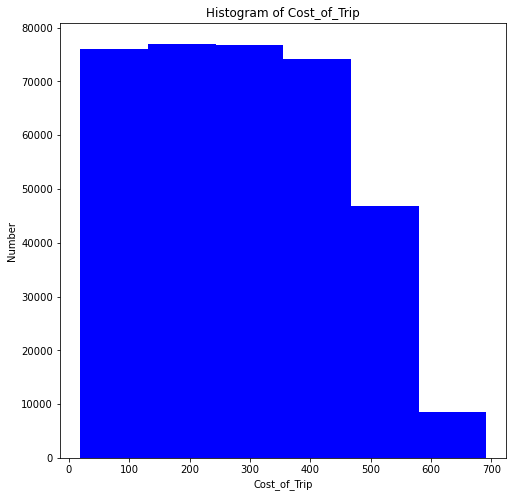

In [18]:
# plotting a histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(master_data, num_cols)

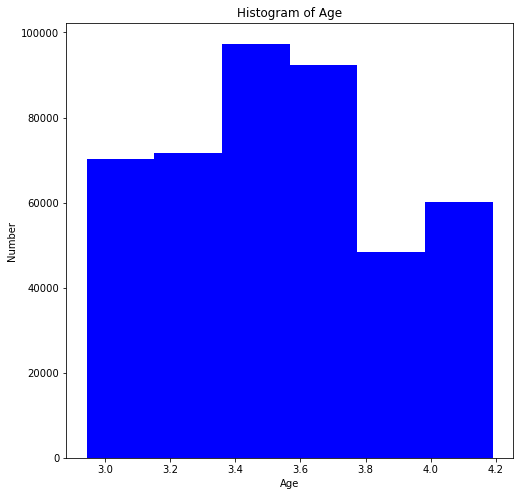

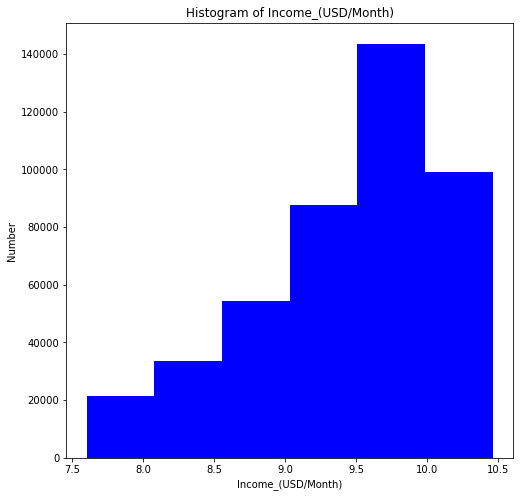

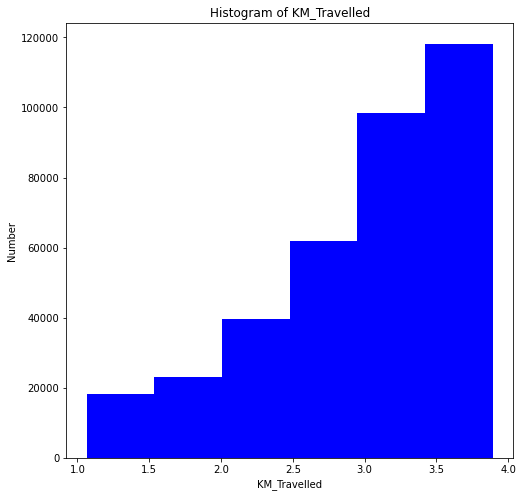

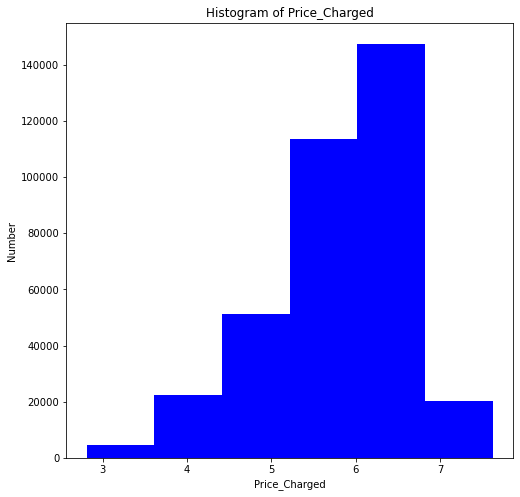

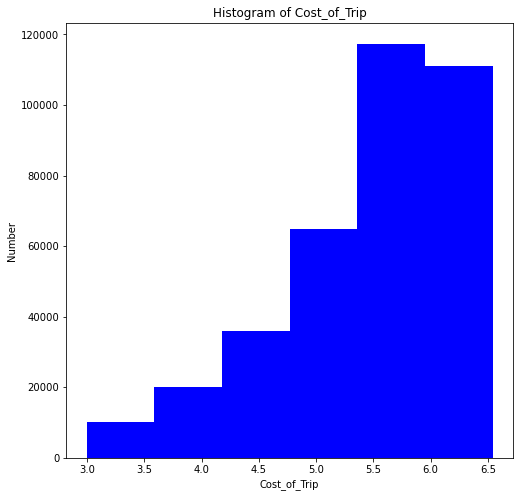

In [19]:
# transforming the numerical columns by using logarithm
x = master_data[num_cols]
for col in num_cols:
    x[col] = np.log1p(x[col])
#plotting histogram of transformed columns
plot_histogram(x, num_cols)

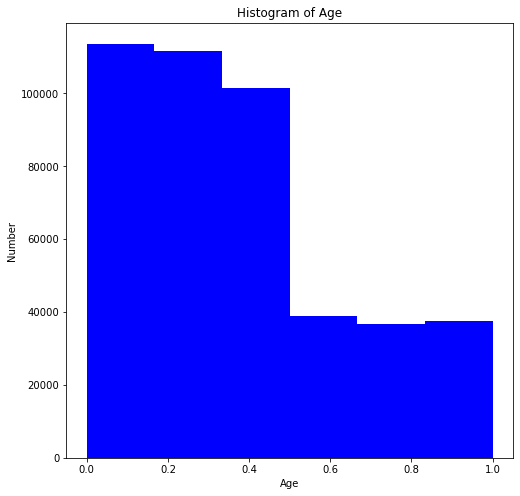

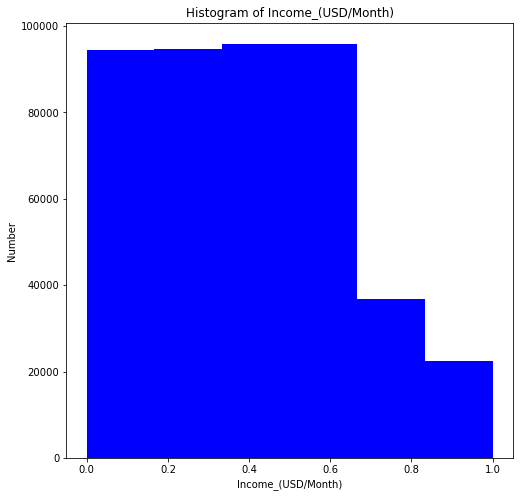

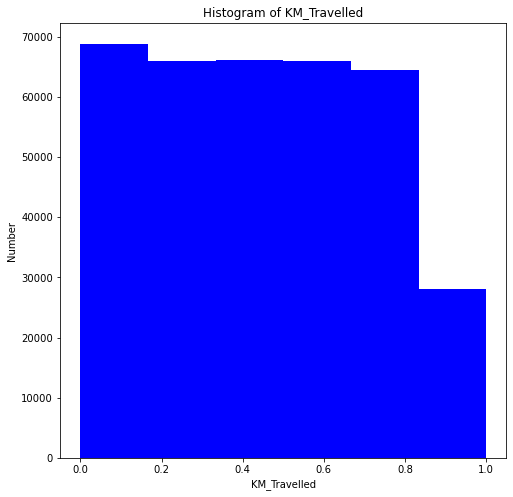

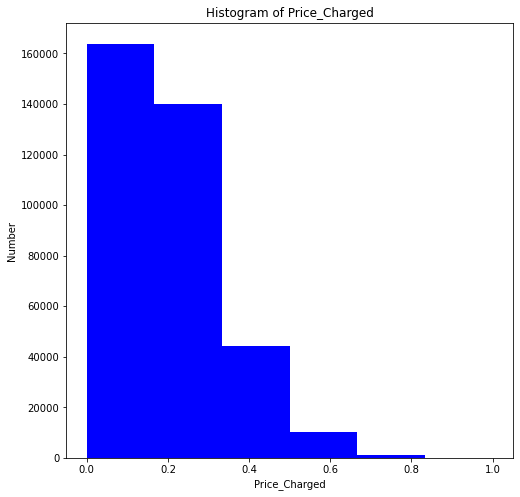

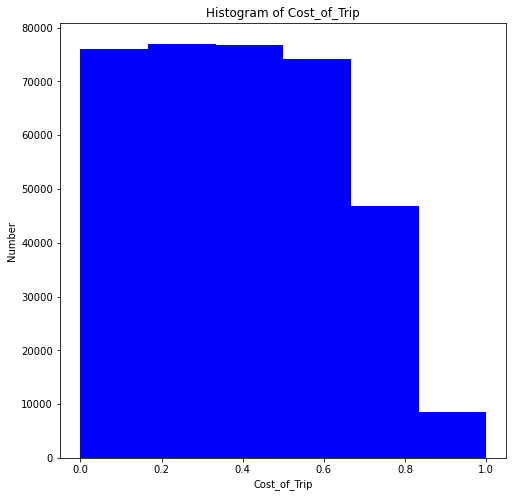

In [20]:
# scaling the numerical features
# min-max scale the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1 = master_data[num_cols]
x1[num_cols] = scaler.fit_transform(x1[num_cols])
#plotting histogram of transformed columns
plot_histogram(x1, num_cols)

City


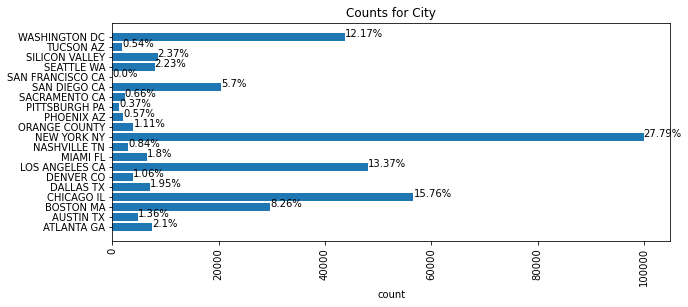

Gender


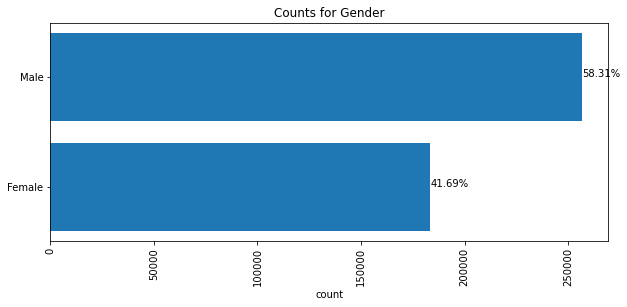

Company


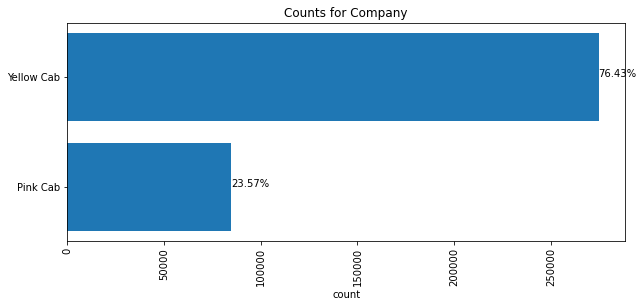

Payment_Mode


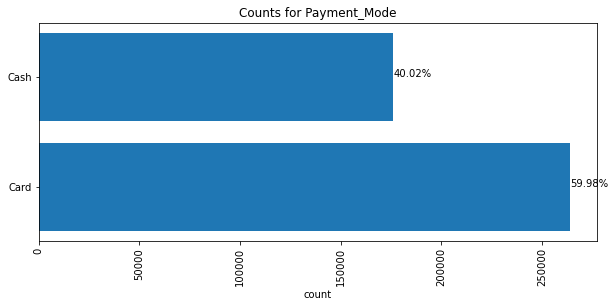

In [21]:
#bar plots for categorical columns
def plot_cols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (10,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()
plot_cols(cat_cols, master_data)



For Age vs City


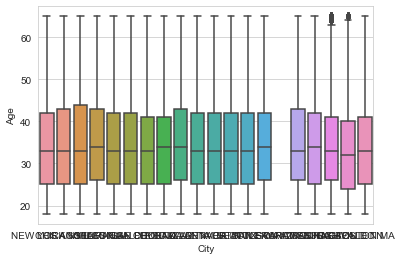



For Age vs Gender


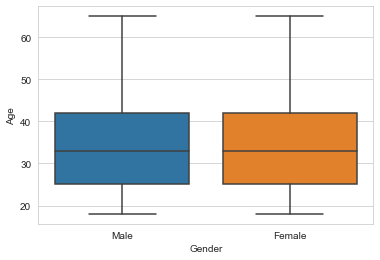



For Age vs Company


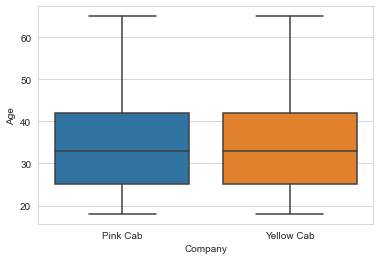



For Age vs Payment_Mode


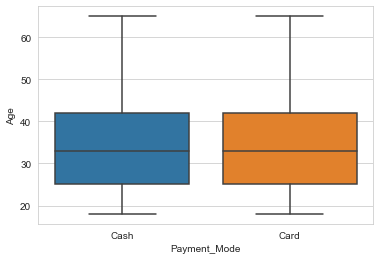



For Income_(USD/Month) vs City


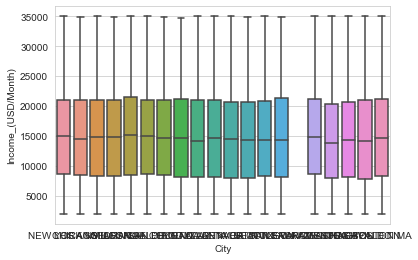



For Income_(USD/Month) vs Gender


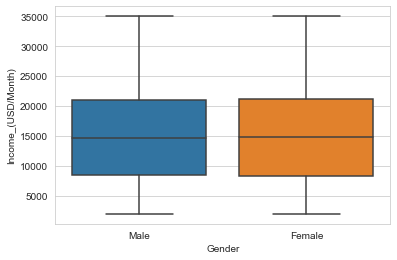



For Income_(USD/Month) vs Company


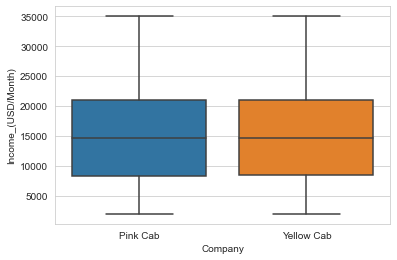



For Income_(USD/Month) vs Payment_Mode


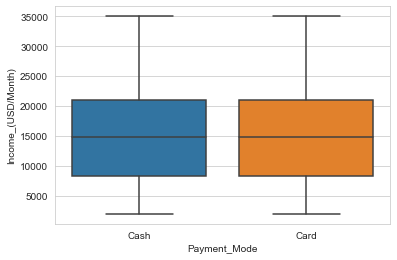



For KM_Travelled vs City


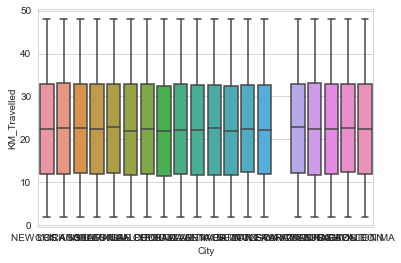



For KM_Travelled vs Gender


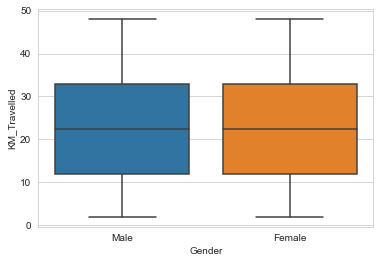



For KM_Travelled vs Company


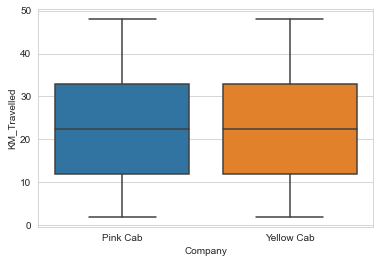



For KM_Travelled vs Payment_Mode


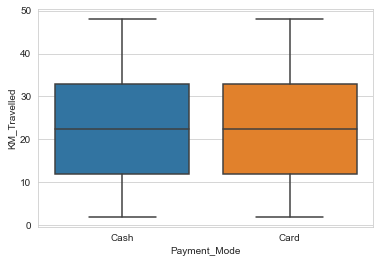



For Price_Charged vs City


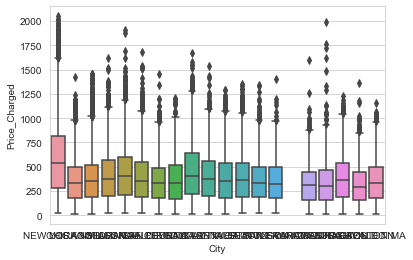



For Price_Charged vs Gender


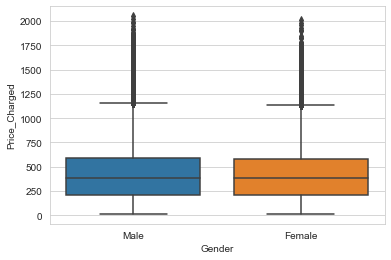



For Price_Charged vs Company


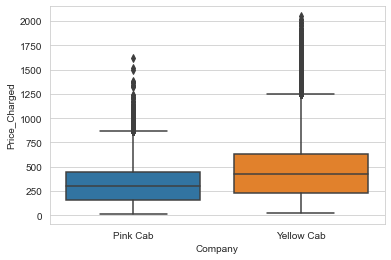



For Price_Charged vs Payment_Mode


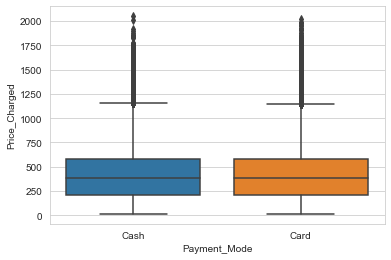



For Cost_of_Trip vs City


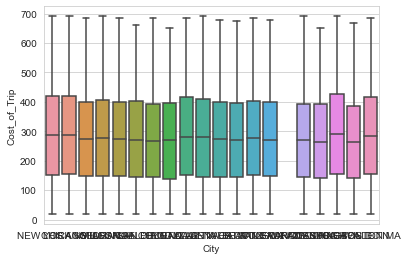



For Cost_of_Trip vs Gender


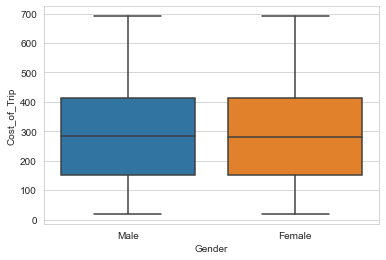



For Cost_of_Trip vs Company


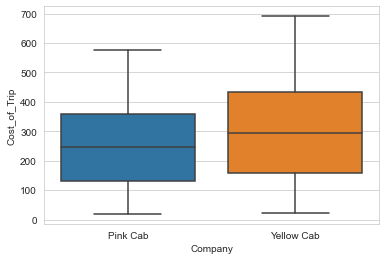



For Cost_of_Trip vs Payment_Mode


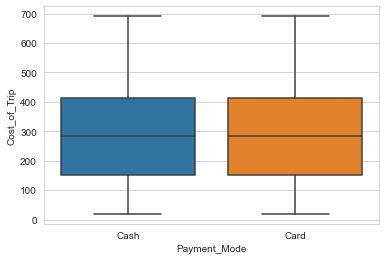

In [22]:
#visualize categorical separation by numerical features
def box_plot(df, num_cols, cat_cols):
    for num_col in num_cols:
        for cat_col in cat_cols:
            print('\n')
            print('For '+ num_col + ' vs ' + cat_col)
            sns.set_style("whitegrid")
            sns.boxplot(x=cat_col, y=num_col, data=df)
            plt.xlabel(cat_col) # Set text for the x axis
            plt.ylabel(num_col)# Set text for y axis
            plt.show()
box_plot(master_data, num_cols, cat_cols)

In [23]:
# creating a correlation matrix
# get correlations
corr = master_data[num_cols].corr()
corr

,Age,Income_(USD/Month),KM_Travelled,Price_Charged,Cost_of_Trip
Age,1.000000,-0.000573,-0.000369,-0.003084,-0.000189
Income_(USD/Month),-0.000573,1.000000,-0.000544,0.003228,-0.000633
KM_Travelled,-0.000369,-0.000544,1.000000,0.835753,0.981848
Price_Charged,-0.003084,0.003228,0.835753,1.000000,0.859812
Cost_of_Trip,-0.000189,-0.000633,0.981848,0.859812,1.000000


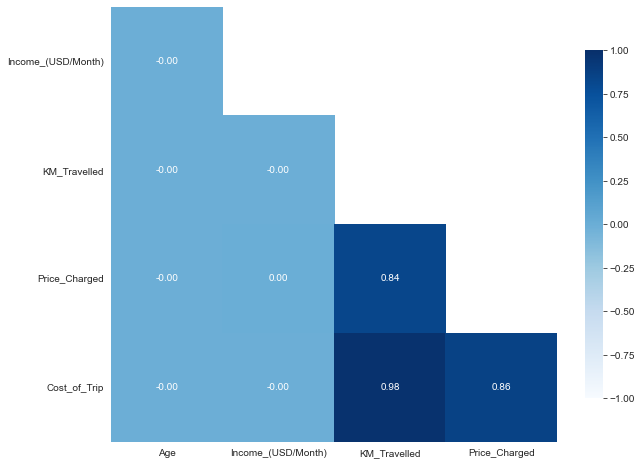

In [24]:
#creating a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# adjusting mask and df
mask = mask[1:, :-1]
corr = corr.iloc[1:,:-1].copy()
# plotting heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

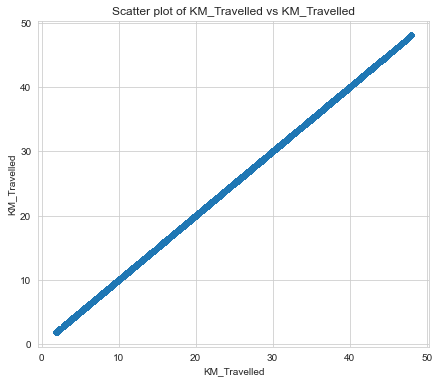

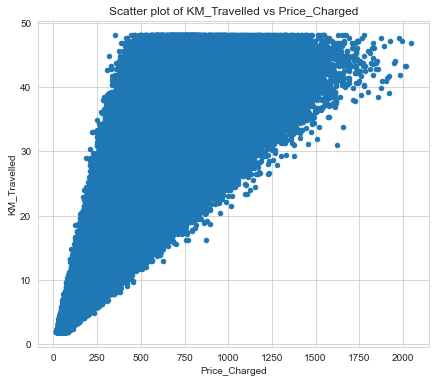

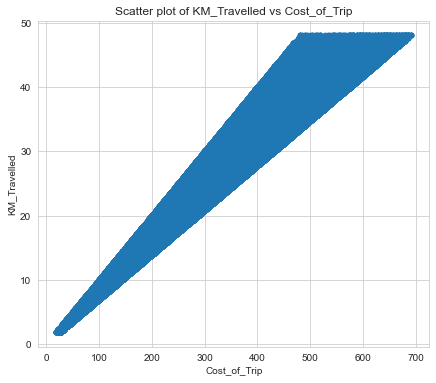

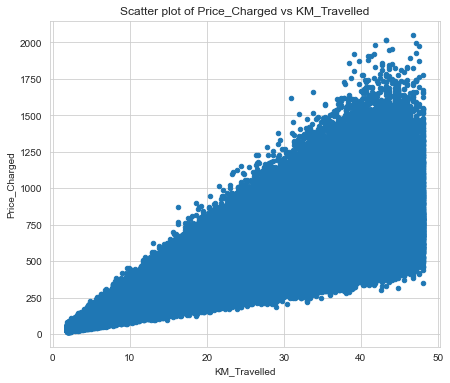

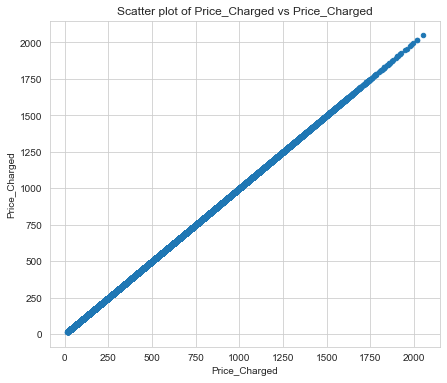

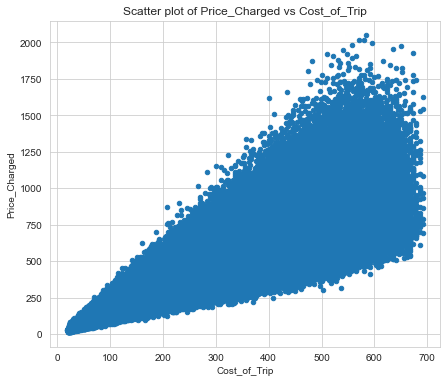

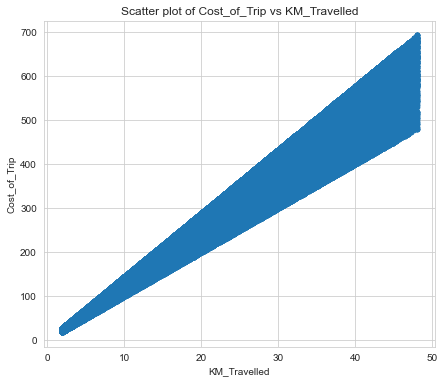

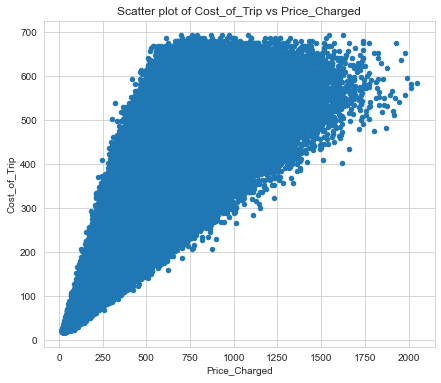

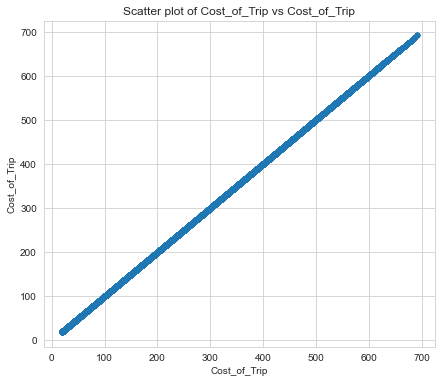

In [25]:
# creating a scatter plot for numerical columns that have strong correlation values
cols = ['KM_Travelled', 'Price_Charged', 'Cost_of_Trip']
for col_y in cols:
    def scatter_plot(df, cols, col_y):
        for col in cols:
            fig = plt.figure(figsize = (7,6))
            ax = fig.gca()
            df.plot.scatter(x = col, y = col_y, ax = ax)
            ax.set_title('Scatter plot of ' + col_y + ' vs ' + col)
            ax.set_xlabel(col)
            ax.set_ylabel(col_y)
            plt.show()
    scatter_plot(master_data, cols, col_y)

In [26]:
#converting from excel time series to python datetime
def convert_excel_time(excel_time):
    '''
    converts excel float format to pandas datetime object
    round to '1min' with 
    .dt.round('1min') to correct floating point conversion innaccuracy
    '''
    
    return pd.to_datetime('1899-12-30') + pd.to_timedelta(excel_time,'D')
master_data['Date_of_Travel'] = convert_excel_time(master_data['Date_of_Travel'])
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,dummy
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.1350,Cash,1.0
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,1.0
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,1.0
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,1.0
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.0480,Card,1.0


In [27]:

#extracting features from date column
for date_feature in ['year', 'quarter', 'month']:
    master_data[date_feature] = getattr(master_data['Date_of_Travel'].dt, date_feature)
master_data.head()

,City,Population,Users,Customer_ID,Gender,Age,Income_(USD/Month),Transaction_ID,Date_of_Travel,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Payment_Mode,dummy,year,quarter,month
0,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.1350,Cash,1.0,2016.0,1.0,1.0
1,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10006684.0,2016-02-05,Yellow Cab,34.34,1099.35,482.1336,Cash,1.0,2016.0,1.0,2.0
2,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10015798.0,2016-03-13,Yellow Cab,19.20,559.30,264.9600,Card,1.0,2016.0,1.0,3.0
3,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10074689.0,2016-09-08,Yellow Cab,14.84,322.28,179.8608,Card,1.0,2016.0,3.0,9.0
4,NEW YORK NY,"8,405,837","302,149",2416.0,Male,28.0,21399.0,10078883.0,2016-09-18,Pink Cab,37.08,728.27,393.0480,Card,1.0,2016.0,3.0,9.0


In [29]:
#converting the variable types for date columns
date_cols = ['year', 'quarter', 'month']
for col in date_cols:
    master_data[col] = master_data[col].astype('category')
master_data[date_cols].dtypes

year       category
quarter    category
month      category
dtype: object

In [30]:
# checking value counts for extracted columns
for col in date_cols:
    print('\n' + col)
    print(master_data[col].value_counts())


year
2017.0    128510
2018.0    123563
2016.0    107319
Name: year, dtype: int64

quarter
4.0    130559
3.0     95858
2.0     69848
1.0     63127
Name: quarter, dtype: int64

month
12.0    47007
11.0    42700
10.0    40852
9.0     36859
8.0     31323
7.0     27676
6.0     24713
5.0     23701
1.0     23174
3.0     21646
4.0     21434
2.0     18307
Name: month, dtype: int64


year


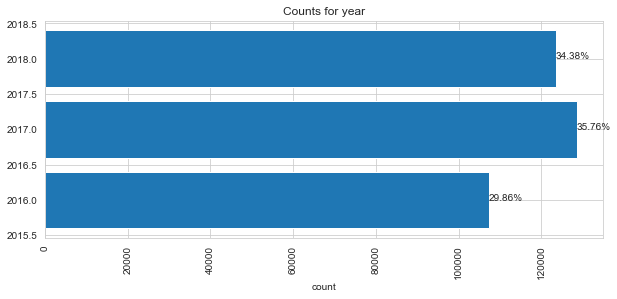

quarter


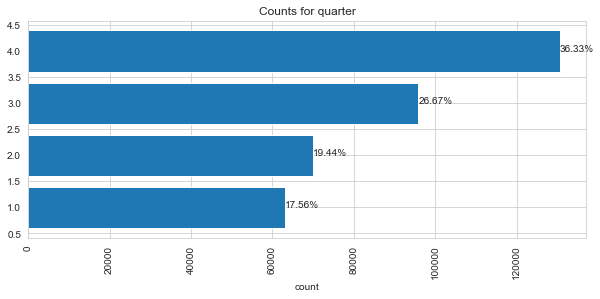

month


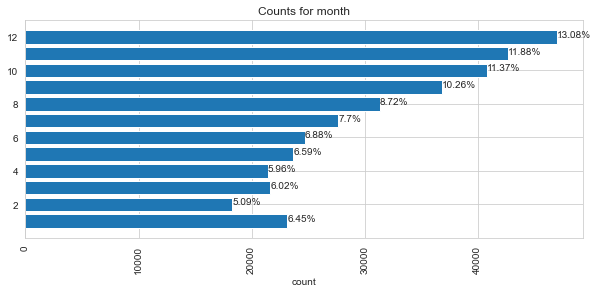

In [31]:
#bar plots for the exctracted columns
plot_cols(date_cols, master_data)



For Age vs year


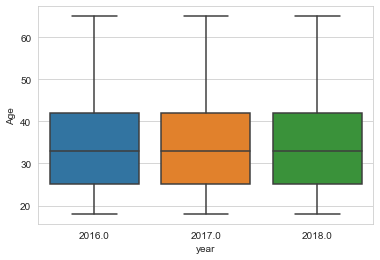



For Age vs quarter


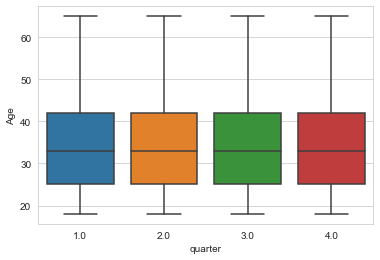



For Age vs month


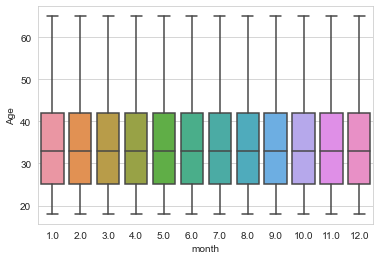



For Income_(USD/Month) vs year


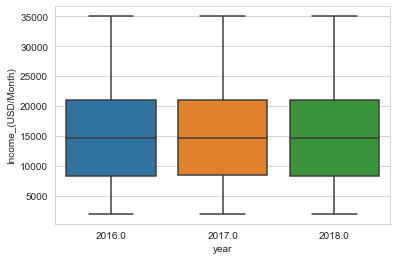



For Income_(USD/Month) vs quarter


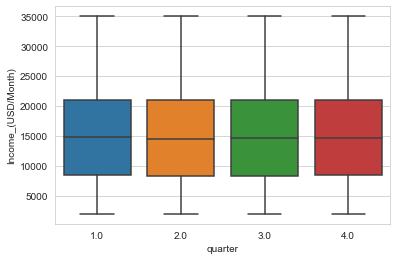



For Income_(USD/Month) vs month


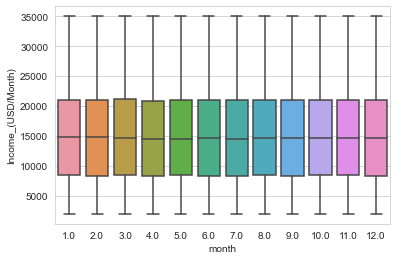



For KM_Travelled vs year


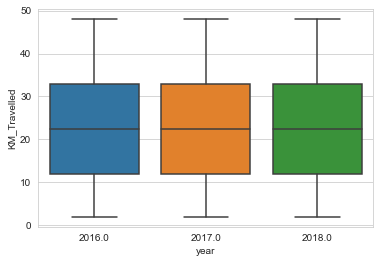



For KM_Travelled vs quarter


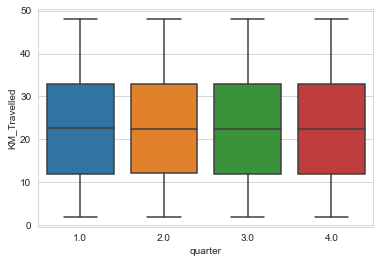



For KM_Travelled vs month


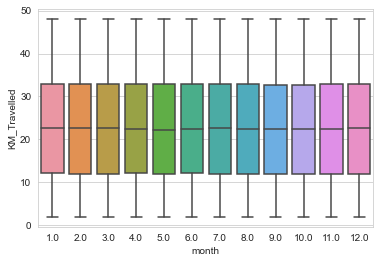



For Price_Charged vs year


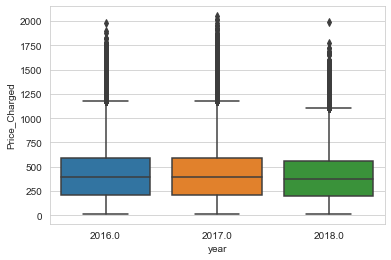



For Price_Charged vs quarter


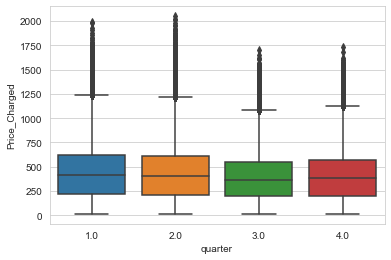



For Price_Charged vs month


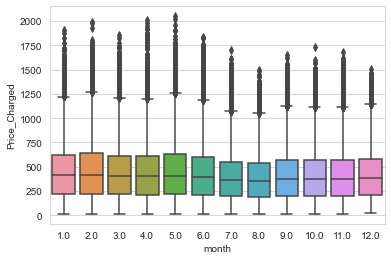



For Cost_of_Trip vs year


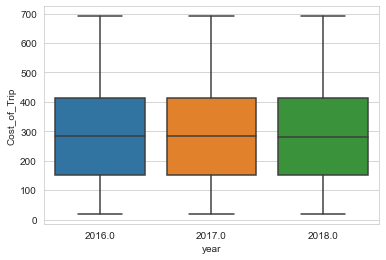



For Cost_of_Trip vs quarter


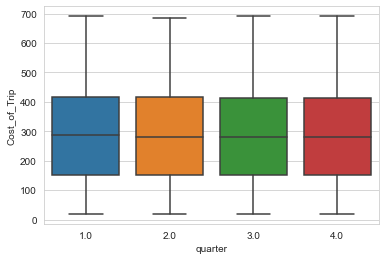



For Cost_of_Trip vs month


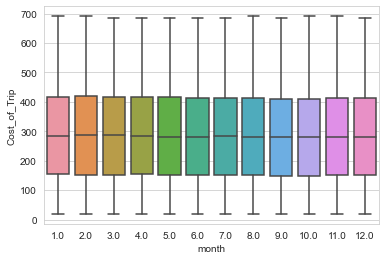

In [32]:
#visualizing date columns separation by numerical features
box_plot(master_data, num_cols, date_cols)